In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Data Cleaning, EDA, Standardisation

In [ ]:
print(f'Columns in the dataset:\n\n{df.columns}')

Columns in the dataset:

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
# Removing unwanted spaces and replacing space between words with underscore
df.columns = df.columns.str.strip().str.replace(' ','_')

In [ ]:
# Renaming a column name appropriately
df.rename(columns = {'thinness__1-19_years':'thinness_1-19_years'},inplace = True)

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
 #Display of number of missing values in each feature
print(f'NULL values in the dataset:\n\n{df.isnull().sum()}')

NULL values in the dataset:

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [ ]:
# Duplicates in the dataset
print(f'Duplicates in the dataset: {df.duplicated().sum()}')

Duplicates in the dataset: 0


In [ ]:
df.dropna(axis=0, subset=['Life_expectancy'], inplace = True) #We remove the rows with null values in the target variable
df.reset_index(inplace = True)

In [ ]:
df = df.drop(['index'], axis = 1)
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


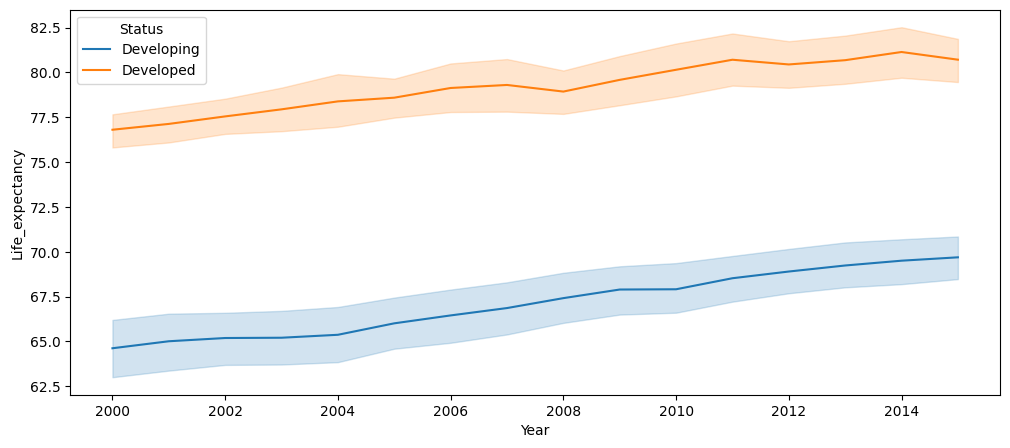

In [ ]:
# Life_expectancy over the years on the basis of country status

plt.figure(figsize = (12,5))
sns.lineplot(df,x = 'Year', y = 'Life_expectancy',hue = 'Status')
plt.show()

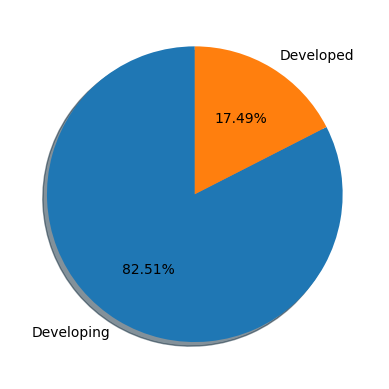

In [ ]:
# Percentage of data present according to country status

plt.pie(df['Status'].value_counts(), labels = df['Status'].value_counts().index,
        autopct = '%.2f%%', shadow = True, startangle=90)
plt.show()

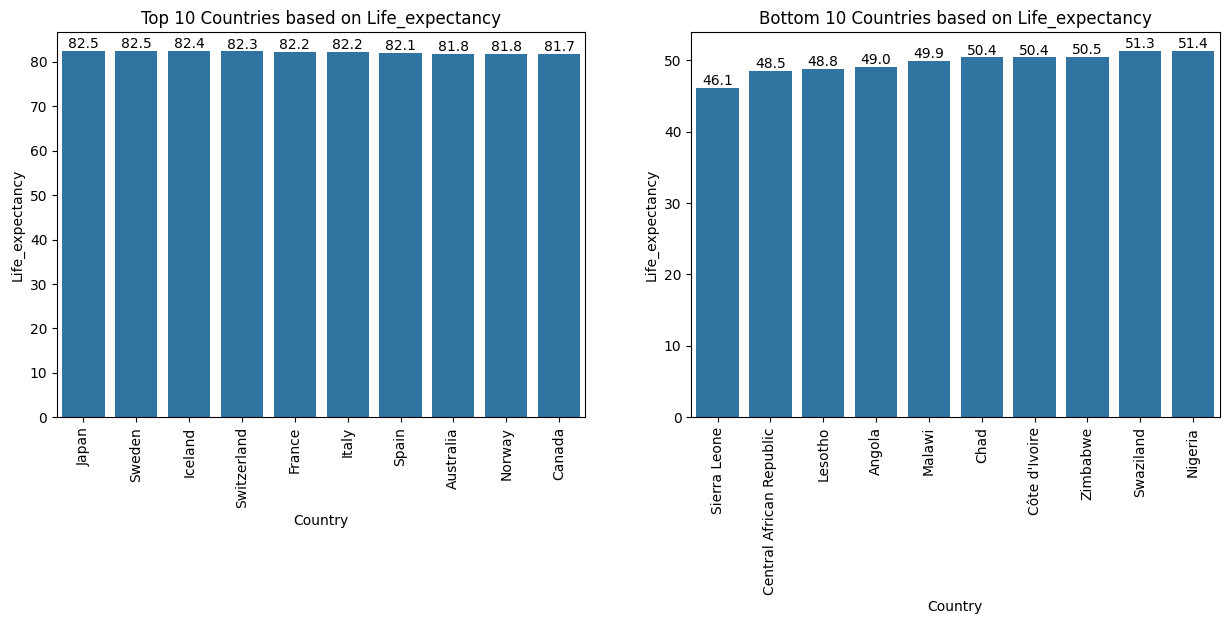

In [ ]:
# Display of top and bottom 10 countries on Life_expectancy

top_data = pd.DataFrame(df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = False).head(10))
bottom_data = pd.DataFrame(df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = True).head(10))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Top 10 Countries based on Life_expectancy')
ax1 = sns.barplot(top_data,x = top_data.index, y = 'Life_expectancy')
ax1.bar_label(ax1.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Bottom 10 Countries based on Life_expectancy')
ax2 = sns.barplot(bottom_data,x = bottom_data.index, y = 'Life_expectancy')
ax2.bar_label(ax2.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.show()

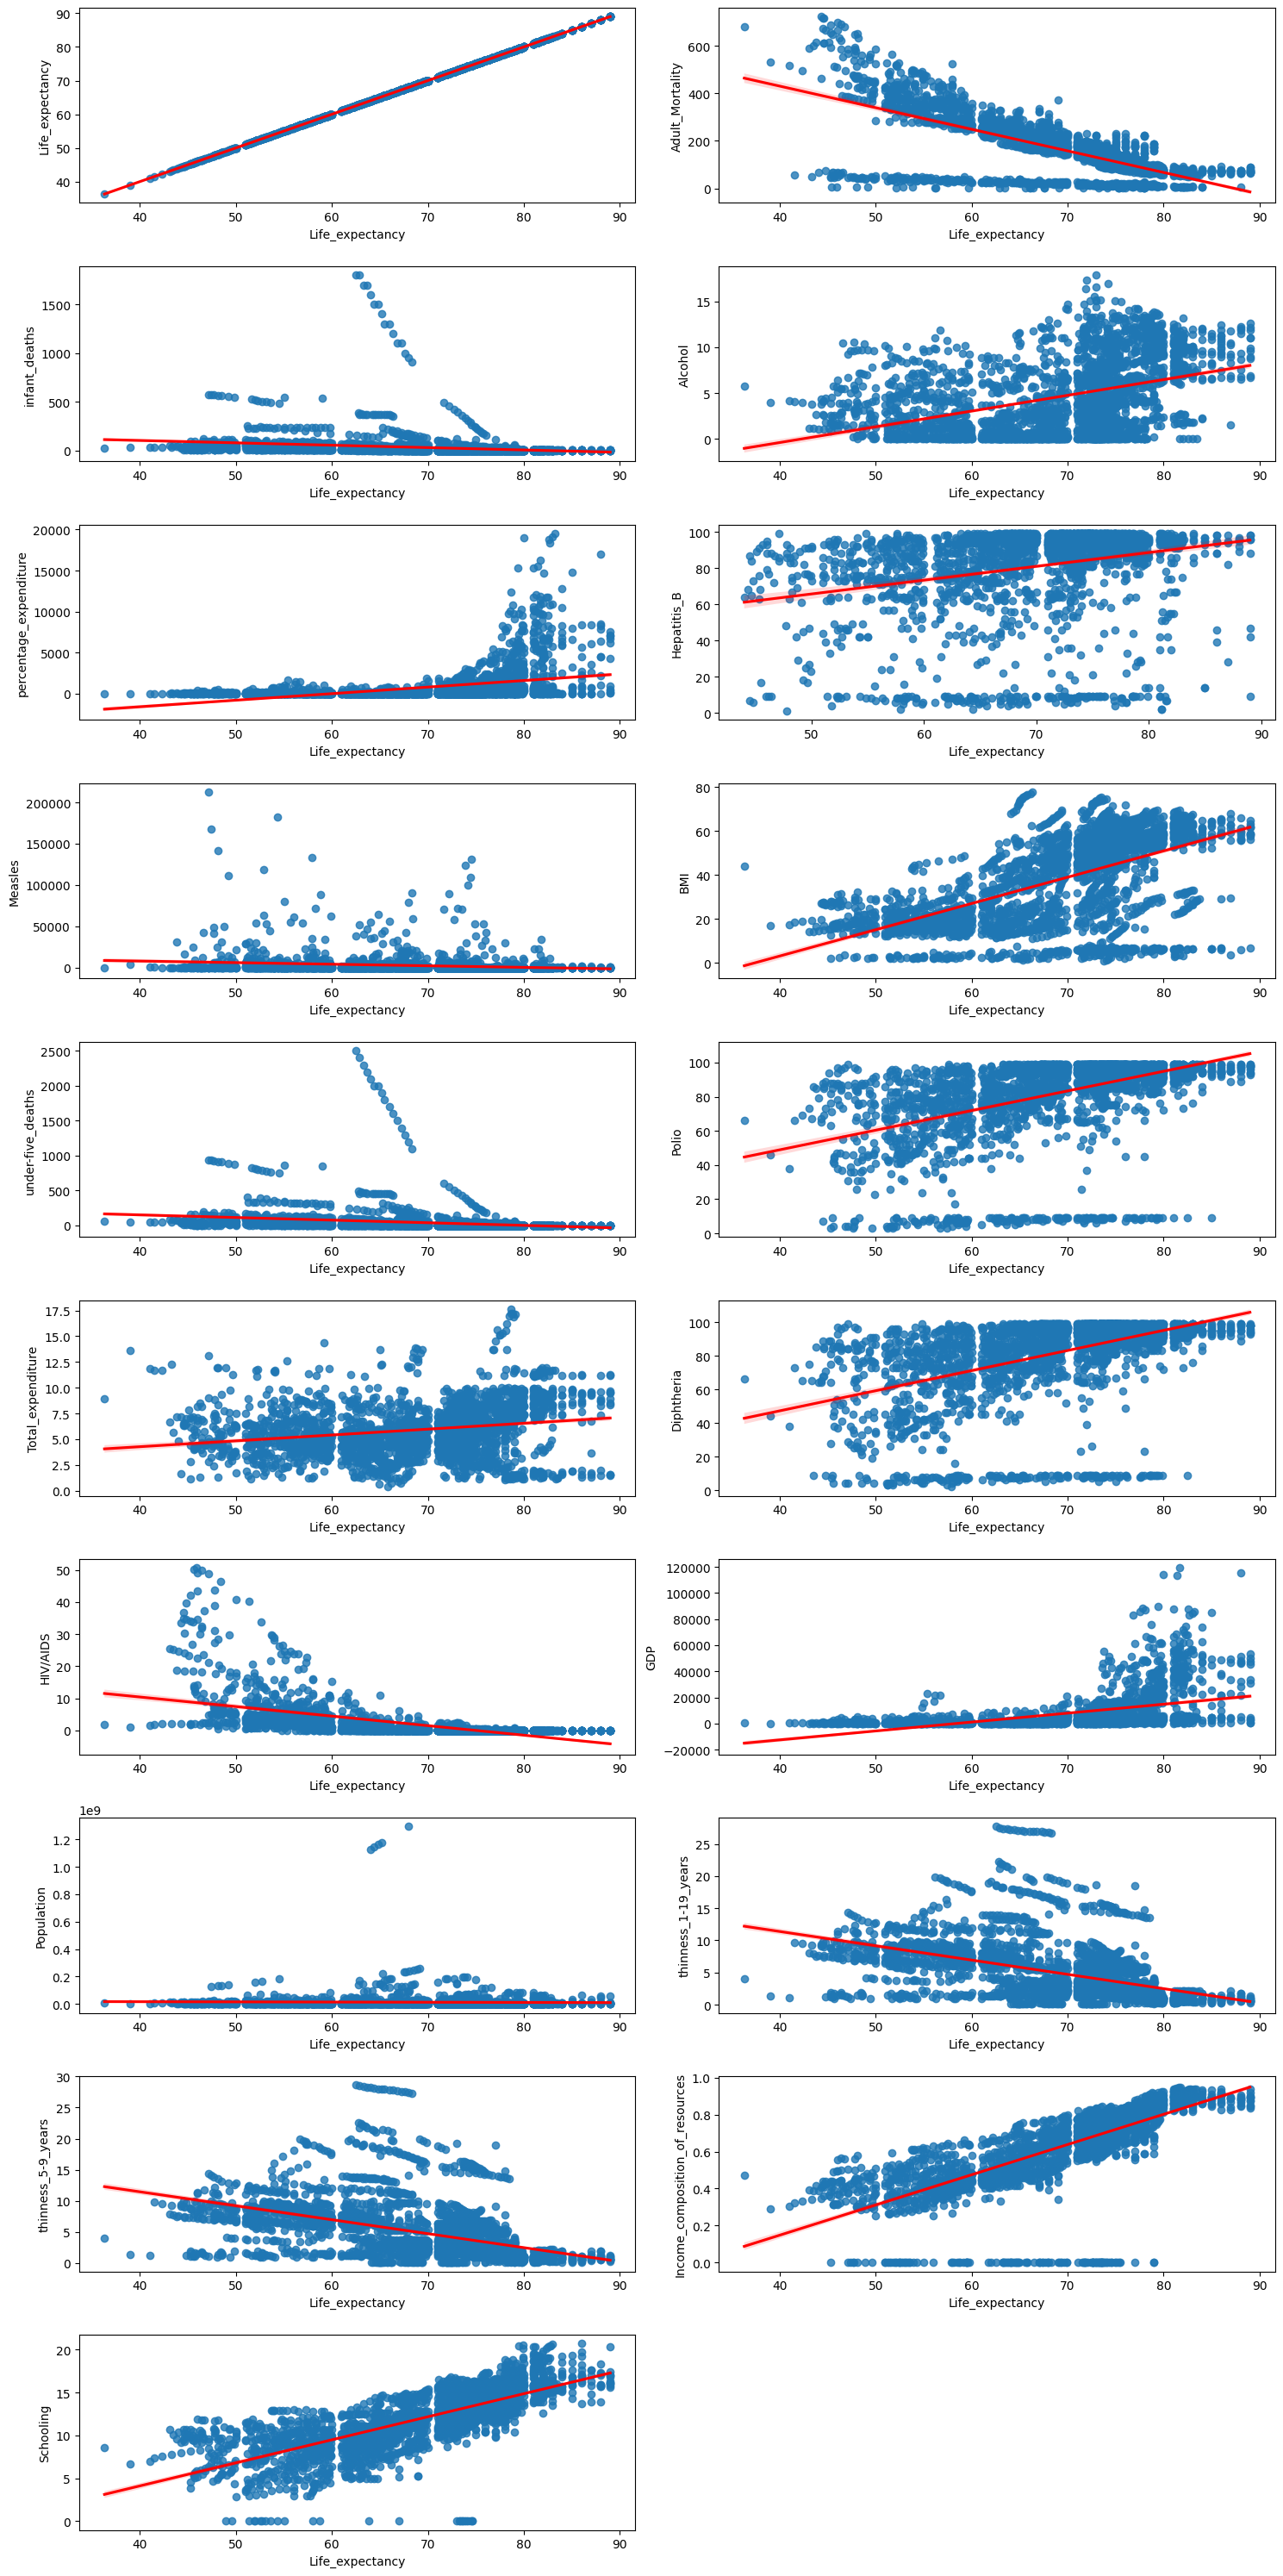

In [ ]:
#Separating the numerical features from the dataset

df_numerical = df.select_dtypes(include=np.number)

# Visualising the linera relationship between Life_expectancy and other features of the dataset

plt.figure(figsize=(15,30))
for col in range(1,len(df_numerical.columns)):
    plt.subplot(10,2,col)
    sns.regplot(df_numerical,y = df_numerical.columns[col], x = 'Life_expectancy', line_kws = {'color' : 'r'})
plt.tight_layout()
plt.show()

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [ ]:
le1 = LabelEncoder()
df['Country'] = le1.fit_transform(df['Country'])
le2 = LabelEncoder()
df['Status'] = le2.fit_transform(df['Status'])
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,182,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,182,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,182,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,182,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# Splitting the dependent and independent variables of the dataset

X = df.drop('Life_expectancy', axis = 1)
y = df.Life_expectancy

In [ ]:
X

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,182,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,182,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,182,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,182,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2923    44.3
2924    44.5
2925    44.8
2926    45.3
2927    46.0
Name: Life_expectancy, Length: 2928, dtype: float64

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,-1.722612,1.626978,0.460348,0.790238,0.267520,-1.136999,-0.336102,-0.638100,-0.110924,-0.958872,...,-3.269528,0.898109,-0.730782,-0.324055,-0.483911,0.343666,2.793935,2.754279,-0.703606,-0.567762
1,-1.722612,1.410048,0.460348,0.854614,0.284455,-1.136999,-0.334975,-0.758037,-0.168570,-0.983927,...,-1.048506,0.906164,-0.857351,-0.324055,-0.481920,-0.203803,2.861808,2.798637,-0.717829,-0.597650
2,-1.722612,1.193118,0.460348,0.830473,0.301391,-1.136999,-0.335128,-0.678079,-0.173968,-1.008982,...,-0.877658,0.886026,-0.772972,-0.324055,-0.480586,0.310813,2.907056,2.842994,-0.746273,-0.627538
3,-1.722612,0.976187,0.460348,0.862660,0.326794,-1.136999,-0.332633,-0.558142,0.031273,-1.034037,...,-0.664098,1.043106,-0.646403,-0.324055,-0.477910,-0.148590,2.952304,2.909530,-0.779457,-0.657426
4,-1.722612,0.759257,0.460348,0.886801,0.343730,-1.136999,-0.368345,-0.518163,0.050953,-1.054081,...,-0.621386,0.781306,-0.604214,-0.324055,-0.520378,-0.160361,3.020176,2.953887,-0.822124,-0.747089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,1.722612,-0.759257,0.460348,4.491830,-0.028854,-0.062927,-0.371910,-0.518163,-0.208712,-0.557993,...,-0.664098,0.483257,-0.730782,6.264372,-0.493008,0.000213,1.029256,1.002162,-1.044936,-0.836753
2924,1.722612,-0.976187,0.460348,4.427455,-0.037321,-0.137001,-0.371910,-2.956888,-0.124508,-0.578037,...,-3.226816,0.237568,-0.604214,6.874047,-0.493079,-0.002141,1.119752,1.113055,-0.992788,-0.747089
2925,1.722612,-1.193118,0.460348,-0.738680,-0.045789,-0.045643,-0.371910,-0.318267,-0.184940,-0.598081,...,-0.407826,0.241596,-0.477645,7.483722,-0.520811,-0.207115,-0.825920,-0.794313,-0.950122,-0.597650
2926,1.722612,-1.410048,0.460348,4.194093,-0.045789,-0.714778,-0.371910,-0.198330,-0.165348,-0.618125,...,-0.279691,0.092571,-0.308887,7.936062,-0.486409,-0.006528,-0.735424,-0.705598,-0.950122,-0.657426


In [ ]:
# Imputation of missing values using KNNImputer

imputer = KNNImputer(n_neighbors = 11)
X_scaled_imputed = pd.DataFrame(imputer.fit_transform(X_scaled), columns = X_scaled.columns)

In [ ]:
X_scaled_imputed

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,-1.722612,1.626978,0.460348,0.790238,0.267520,-1.136999,-0.336102,-0.638100,-0.110924,-0.958872,...,-3.269528,0.898109,-0.730782,-0.324055,-0.483911,0.343666,2.793935,2.754279,-0.703606,-0.567762
1,-1.722612,1.410048,0.460348,0.854614,0.284455,-1.136999,-0.334975,-0.758037,-0.168570,-0.983927,...,-1.048506,0.906164,-0.857351,-0.324055,-0.481920,-0.203803,2.861808,2.798637,-0.717829,-0.597650
2,-1.722612,1.193118,0.460348,0.830473,0.301391,-1.136999,-0.335128,-0.678079,-0.173968,-1.008982,...,-0.877658,0.886026,-0.772972,-0.324055,-0.480586,0.310813,2.907056,2.842994,-0.746273,-0.627538
3,-1.722612,0.976187,0.460348,0.862660,0.326794,-1.136999,-0.332633,-0.558142,0.031273,-1.034037,...,-0.664098,1.043106,-0.646403,-0.324055,-0.477910,-0.148590,2.952304,2.909530,-0.779457,-0.657426
4,-1.722612,0.759257,0.460348,0.886801,0.343730,-1.136999,-0.368345,-0.518163,0.050953,-1.054081,...,-0.621386,0.781306,-0.604214,-0.324055,-0.520378,-0.160361,3.020176,2.953887,-0.822124,-0.747089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,1.722612,-0.759257,0.460348,4.491830,-0.028854,-0.062927,-0.371910,-0.518163,-0.208712,-0.557993,...,-0.664098,0.483257,-0.730782,6.264372,-0.493008,0.000213,1.029256,1.002162,-1.044936,-0.836753
2924,1.722612,-0.976187,0.460348,4.427455,-0.037321,-0.137001,-0.371910,-2.956888,-0.124508,-0.578037,...,-3.226816,0.237568,-0.604214,6.874047,-0.493079,-0.002141,1.119752,1.113055,-0.992788,-0.747089
2925,1.722612,-1.193118,0.460348,-0.738680,-0.045789,-0.045643,-0.371910,-0.318267,-0.184940,-0.598081,...,-0.407826,0.241596,-0.477645,7.483722,-0.520811,-0.207115,-0.825920,-0.794313,-0.950122,-0.597650
2926,1.722612,-1.410048,0.460348,4.194093,-0.045789,-0.714778,-0.371910,-0.198330,-0.165348,-0.618125,...,-0.279691,0.092571,-0.308887,7.936062,-0.486409,-0.006528,-0.735424,-0.705598,-0.950122,-0.657426


In [ ]:
print(f'Number of NULL values in each column after imputation:\n\n{X_scaled_imputed.isnull().sum()}')

Number of NULL values in each column after imputation:

Country                            0
Year                               0
Status                             0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


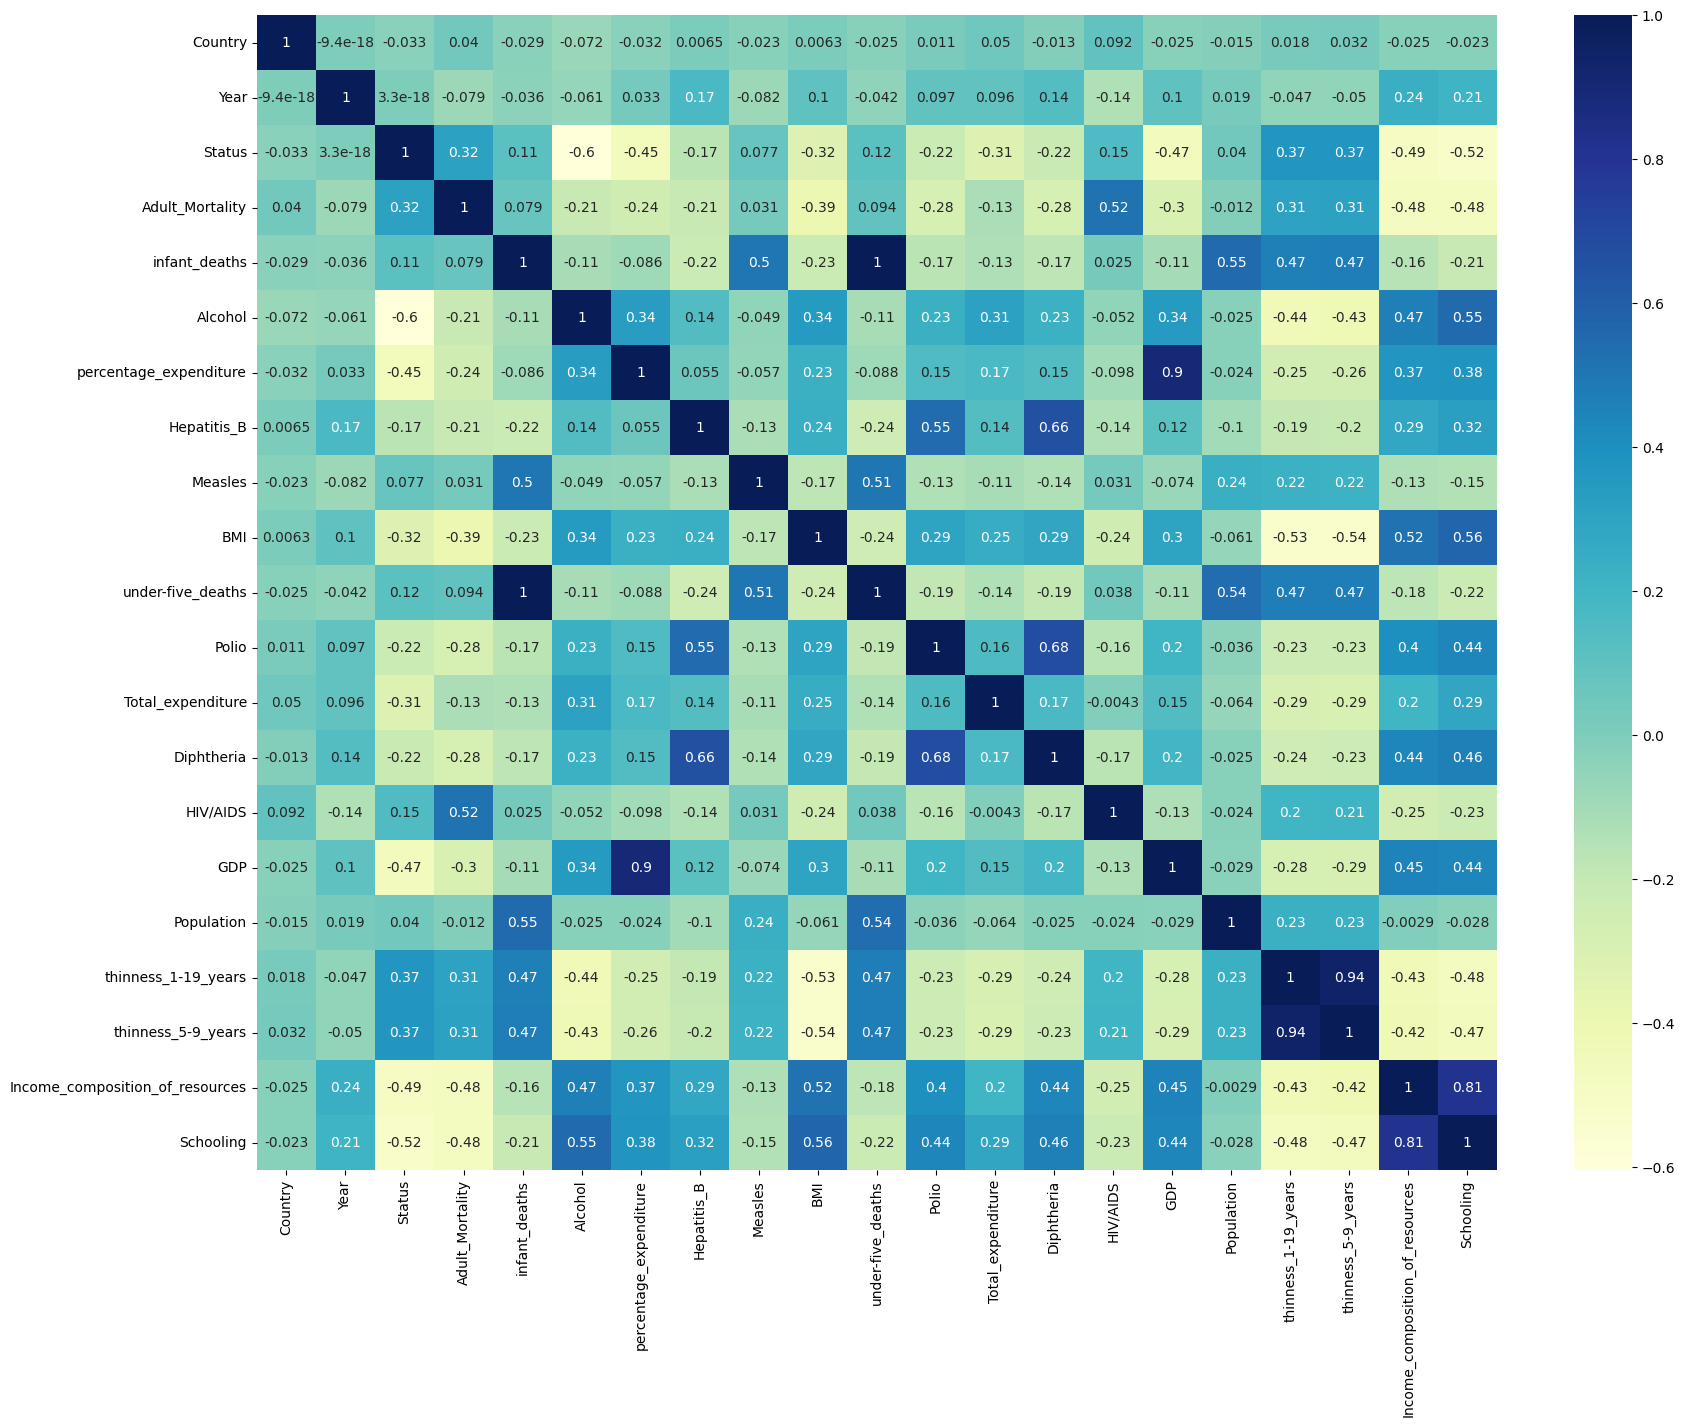

In [ ]:
# Checking for correlation between the features

plt.figure(figsize = (20,15))
sns.heatmap(X_scaled_imputed.corr(),  annot = True, cmap = 'YlGnBu')
plt.show()

In [ ]:
# Highly correlated colums are

# infant_deaths      vs  under-five_deaths
# GDP                vs  percentage_expenditure
# thinness_5-9_years vs  thinness_1-19_years

In [ ]:
#Dropping columns that are highly correlated

X_scaled_imputed.drop(['under-five_deaths','percentage_expenditure', 'thinness_1-19_years'],axis =1, inplace = True)

In [ ]:
print(f'Shape of final dataset: {X_scaled_imputed.shape}')

Shape of final dataset: (2928, 18)


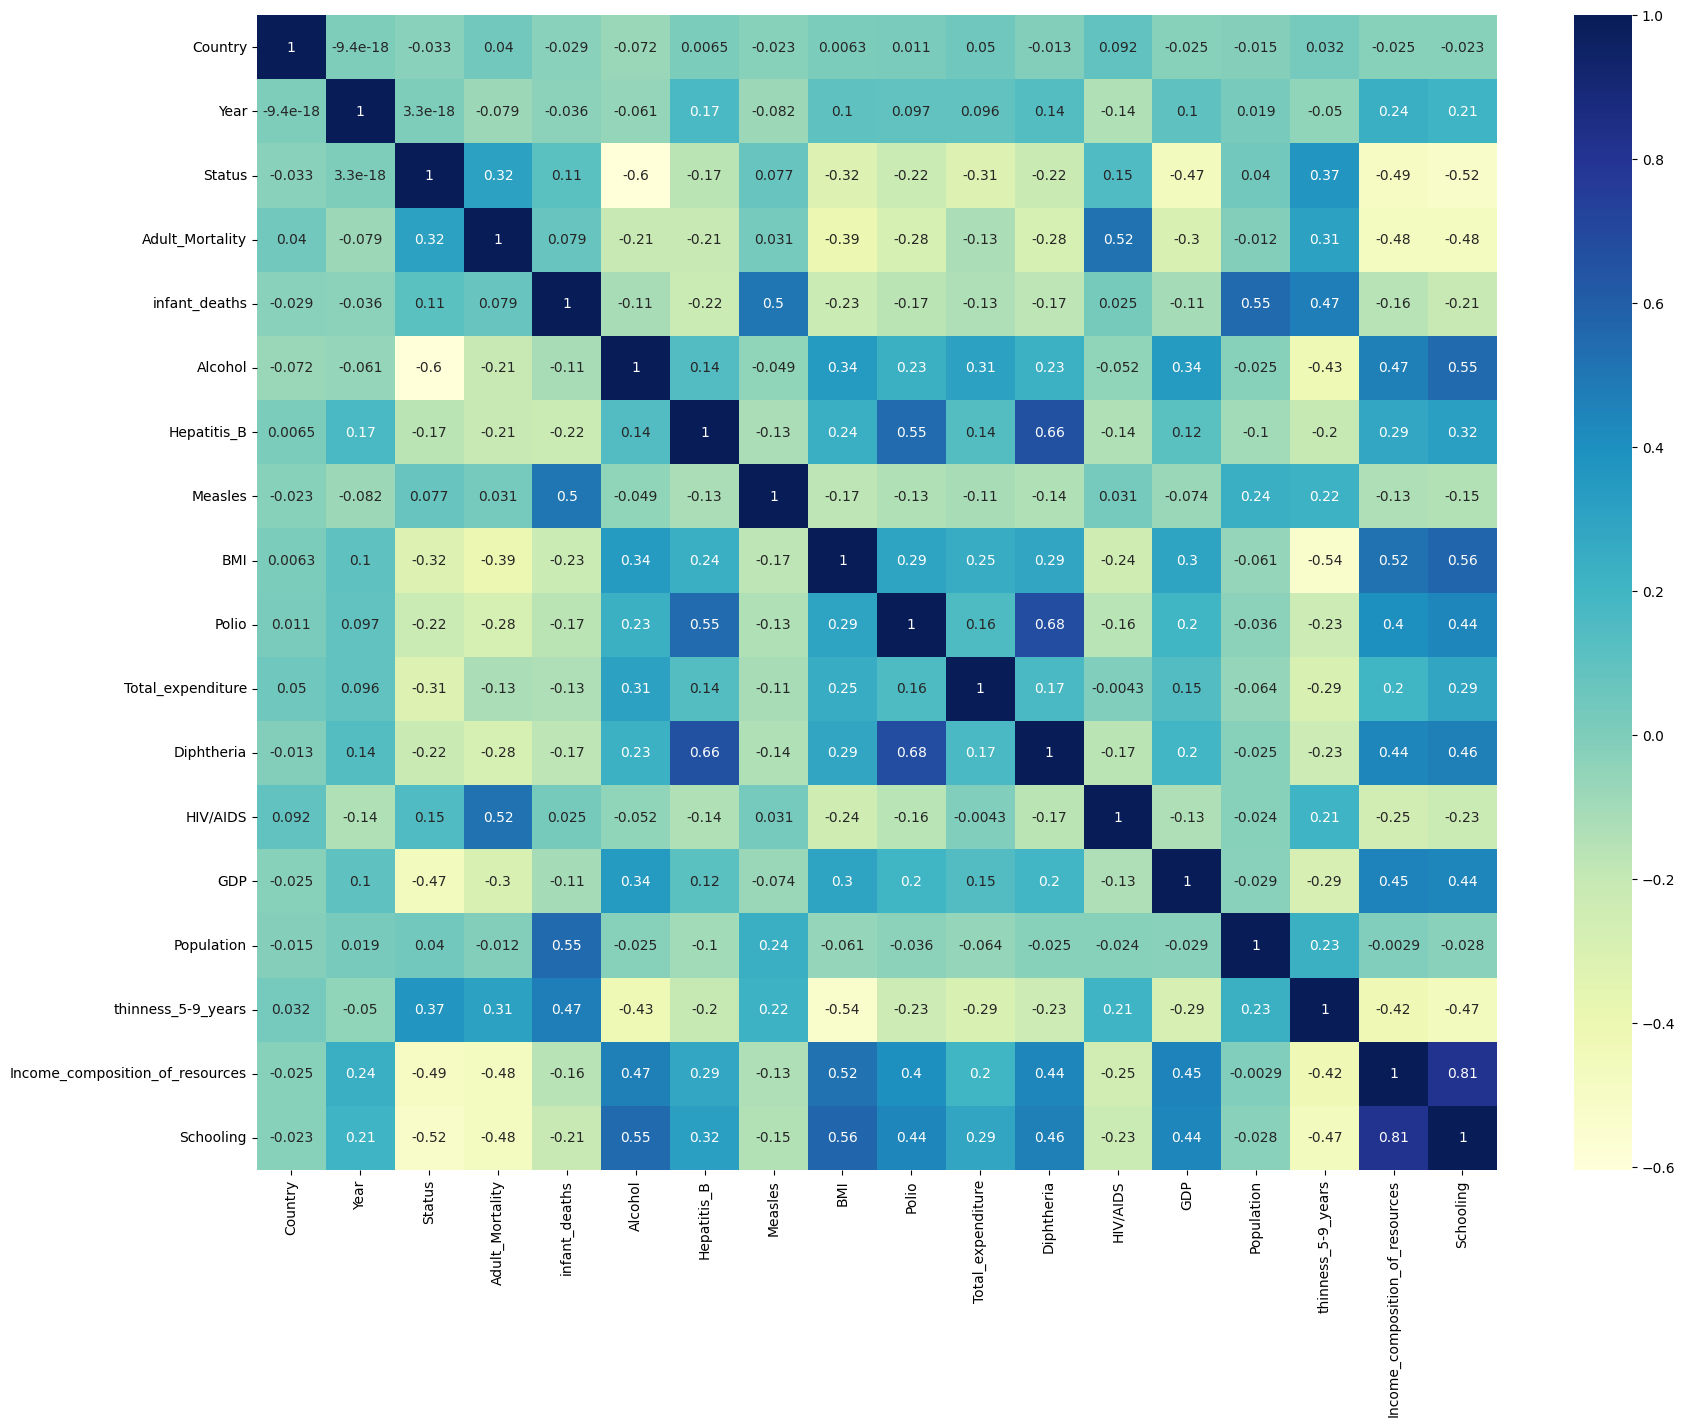

In [ ]:
# Ensuring there is no further correlation

plt.figure(figsize = (20,15))
sns.heatmap(X_scaled_imputed.corr(),  annot = True, cmap = 'YlGnBu')
plt.show()

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled_imputed, y, test_size = 0.2, random_state = 7)

In [ ]:
X_train_scaled.reset_index(drop=True,inplace=True)
X_test_scaled.reset_index(drop=True,inplace=True)

In [ ]:
X_train_scaled

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.018930,-0.325396,0.460348,3.936591,-0.215145,-0.495025,0.401357,-0.211325,-0.517905,0.232853,0.479229,0.281766,6.362707,-0.460695,-0.176960,0.846911,-0.902715,-0.388435
1,-0.359666,1.410048,-2.172268,-0.223676,-0.257484,-1.136999,0.543101,-0.211412,1.301083,0.702684,0.592005,0.703661,-0.324055,0.463869,-0.047491,-0.727777,0.979337,1.135848
2,-1.135788,1.626978,0.460348,1.868528,-0.130467,-0.932735,-1.357724,-0.198350,-0.778477,-1.518337,-0.744456,-1.490194,0.521624,-0.500430,-0.208427,0.736017,-1.329377,-1.464399
3,-1.684752,0.542326,0.460348,-0.368521,-0.079660,-1.028357,0.561273,-0.202443,0.784952,0.531837,-0.326308,0.534903,-0.324055,-0.212251,0.382685,0.203729,0.410455,0.478314
4,1.022209,-0.759257,-2.172268,-0.215629,-0.257484,1.337070,0.721189,-0.211238,0.719809,0.702684,0.515479,0.703661,-0.324055,-0.315735,0.009174,-0.749956,0.704377,0.538090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,0.170368,0.976187,0.460348,-0.803056,-0.257484,-1.136999,0.721189,-0.211412,-0.708323,0.702684,1.300878,0.703661,-0.324055,-0.066702,-0.209165,2.000203,0.225568,0.029996
2338,1.287226,0.325396,0.460348,0.074060,-0.172806,-1.065394,0.481315,-0.211412,-0.117026,0.446413,-0.000066,0.450524,-0.304388,-0.478163,-0.086715,-0.239845,-0.125243,-0.268883
2339,-1.116858,-0.325396,0.460348,2.005326,0.123567,-1.038234,-2.117327,-0.072610,-1.129246,-1.432913,-1.051292,-3.304343,0.659293,-0.474952,-0.185876,-0.816492,-1.537967,-1.942605
2340,-0.283947,0.759257,0.460348,-0.577742,-0.071193,-1.132061,0.721189,-0.205055,0.830050,0.702684,0.479229,0.703661,-0.324055,-0.290291,0.039420,0.713839,0.557416,0.328875


In [ ]:
X_test_scaled

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_5-9_years,Income_composition_of_resources,Schooling
0,-0.586824,-1.410048,0.460348,-1.301966,-0.232081,-0.583914,0.401357,-0.202791,-0.988938,0.104717,-0.894213,0.197387,0.108618,-0.481714,-0.114153,-0.860849,-1.153972,-1.554063
1,1.003279,-0.976187,-2.172268,-0.738680,-0.257484,-0.786382,0.561273,-0.208538,-0.432719,0.574548,-0.926434,0.577093,-0.324055,1.126059,-0.013038,-0.639062,0.908227,0.209323
2,-0.454315,0.325396,0.460348,1.063834,-0.011918,-1.095024,-0.957933,-0.188423,-1.800718,-3.269528,-0.837825,-1.068298,0.108618,-0.494246,-0.183665,0.780375,-1.191897,-1.165520
3,0.189298,0.325396,0.460348,0.894848,0.208245,-0.993789,-0.398226,0.044509,-1.805729,-0.236979,0.370482,-0.393266,-0.029050,-0.476005,-0.185139,0.869090,-1.149231,-1.464399
4,0.511105,1.193118,0.460348,1.627120,3.959485,0.909910,-1.397703,4.390814,-0.708323,-1.561049,-0.898240,-1.532383,0.423289,-0.314947,0.072404,-0.816492,-0.537682,-0.657426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,-0.075719,-0.325396,0.460348,-0.609929,-0.249017,-1.136999,0.721189,-0.211412,1.426358,0.702684,-1.482255,0.703661,-0.324055,2.466728,-0.192965,-0.395096,0.756525,0.627754
582,-0.246087,-1.626978,-2.172268,-0.569695,-0.257484,2.334599,0.030641,-0.211412,0.664688,0.147429,0.148959,0.155198,-0.324055,1.312922,-0.202860,-1.016100,1.045707,1.255400
583,-1.381875,-0.542326,0.460348,0.717816,-0.249017,-0.959222,0.561273,-0.210454,-1.079136,0.531837,-0.261865,0.534903,-0.284721,-0.437456,-0.198411,3.042602,-2.974395,-0.836753
584,1.078999,0.976187,0.460348,1.377665,0.174374,-1.136999,-1.219614,0.657884,-0.768455,-1.518337,-0.698320,-1.701141,-0.186386,-0.468188,-0.159362,0.403337,-1.487113,-2.116499


In [ ]:
y_train.reset_index(drop = True, inplace = True)

In [ ]:
y_train

0       45.3
1       75.6
2       52.5
3       74.7
4       74.1
        ... 
2337    77.6
2338    66.7
2339    48.5
2340    74.7
2341    72.6
Name: Life_expectancy, Length: 2342, dtype: float64

In [ ]:
y_test.reset_index(drop = True, inplace = True)
y_test

0      56.3
1      79.3
2      57.3
3      56.0
4      53.2
       ... 
581    73.6
582    76.4
583    65.0
584    53.1
585    65.9
Name: Life_expectancy, Length: 586, dtype: float64

# Normal Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Life Expectancy Data.csv')
df.columns = df.columns.str.strip()
df_cleaned = df.dropna(subset=['Life expectancy'])

for column in df_cleaned.columns:
    if df_cleaned[column].isnull().sum() > 0:
        median_value = df_cleaned[column].median()
        df_cleaned.loc[:, column] = df_cleaned[column].fillna(median_value)


X = df_cleaned.drop(columns=['Country', 'Status', 'Life expectancy'])
y = df_cleaned['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

new_data = pd.DataFrame({
    'Year': [2024],
    'Adult Mortality': [150],
    'infant deaths': [5],
    'Alcohol': [10.0],
    'percentage expenditure': [500],
    'Hepatitis B': [95],
    'Measles': [0],
    'BMI': [20],
    'under-five deaths': [3],
    'Polio': [95],
    'Total expenditure': [6.0],
    'Diphtheria': [95],
    'HIV/AIDS': [0.1],
    'GDP': [3000],
    'Population': [100000],
    'thinness 1-19 years': [2],
    'thinness 5-9 years': [2],
    'Income composition of resources': [0.8],
    'Schooling': [15]
})


new_data.columns = new_data.columns.str.strip()

new_data.columns = X_train.columns

missing_features = set(X_train.columns) - set(new_data.columns)
extra_features = set(new_data.columns) - set(X_train.columns)

if missing_features or extra_features:
       print(f"Missing features: {missing_features}")
       print(f"Extra features: {extra_features}")

new_prediction = model.predict(new_data)
print(f"Predicted Life Expectancy: {new_prediction[0]}")

Mean Squared Error: 15.945058366951326
R^2 Score: 0.8156627914321435
Predicted Life Expectancy: 74.26016454559768


In [ ]:
# Here we have coded Linear Regression from scratch, using closed form solution

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('/content/Life Expectancy Data.csv')
df.columns = df.columns.str.strip()
df_cleaned = df.dropna(subset=['Life expectancy'])

for column in df_cleaned.columns:
    if df_cleaned[column].isnull().sum() > 0:
        median_value = df_cleaned[column].median()
        df_cleaned.loc[:, column] = df_cleaned[column].fillna(median_value)

X = df_cleaned.drop(columns=['Country', 'Status', 'Life expectancy'])
y = df_cleaned['Life expectancy'].values

X = np.hstack((np.ones((X.shape[0], 1)), X))

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_T = X_train.T
theta = np.linalg.inv(X_train_T.dot(X_train)).dot(X_train_T).dot(y_train)

y_pred = X_test.dot(theta)

# rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
# r2 = 1 - (np.sum((y_test - y_pred) * 2) / np.sum((y_test - np.mean(y_test)) * 2))

print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R^2 Score: {r2_score(y_test,y_pred)}")

# new_data = pd.DataFrame({
#     'Year': [2024],
#     'Adult Mortality': [150],
#     'infant deaths': [5],
#     'Alcohol': [10.0],
#     'percentage expenditure': [500],
#     'Hepatitis B': [95],
#     'Measles': [0],
#     'BMI': [20],
#     'under-five deaths': [3],
#     'Polio': [95],
#     'Total expenditure': [6.0],
#     'Diphtheria': [95],
#     'HIV/AIDS': [0.1],
#     'GDP': [3000],
#     'Population': [100000],
#     'thinness 1-19 years': [2],
#     'thinness 5-9 years': [2],
#     'Income composition of resources': [0.8],
#     'Schooling': [15]
# })

# new_data.columns = new_data.columns.str.strip()
# new_data = np.hstack((np.ones((new_data.shape[0], 1)), new_data))

# new_prediction = new_data.dot(theta)
# print(f"Predicted Life Expectancy: {new_prediction[0]}")

# print("Predictions on test data:")
# test_predictions = X_test.dot(theta)
# for i, pred in enumerate(test_predictions):
#     print(f"Actual: {y_test[i]}, Predicted: {pred}")

Mean Squared Error: 17.41897039559728
R^2 Score: 0.8006732505543294


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
r=Ridge()

In [ ]:
r.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
yridgepredict=r.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, yridgepredict)
r2 = r2_score(y_test, yridgepredict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 14.266361983749858
R^2 Score: 0.8409485152790608


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

class RidgeRegression:
    def __init__(self, learning_rate, iterations, l2_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penalty = l2_penalty

    def fit(self, X, Y):
        # assert not np.isnan(X).any(), "X contains NaN values"
        # assert not np.isinf(X).any(), "X contains infinite values"
        # assert not np.isnan(Y).any(), "Y contains NaN values"
        # assert not np.isinf(Y).any(), "Y contains infinite values"

        self.m, self.n = X.shape

        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()

            # Debugging: print weights and bias after each iteration
            print(f"Iteration {i+1}: Weights = {self.W}, Bias = {self.b}")

        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)

        dW = (-(2 * (self.X.T).dot(self.Y - Y_pred)) + (2 * self.l2_penalty * self.W)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    def predict(self, X):
        return np.dot(X, self.W) + self.b

# Example usage
# Assuming `X_train` and `y_train` are defined elsewhere as data

# Convert DataFrames or Series to NumPy arrays
# X_train = X_train.to_numpy() if isinstance(X_train, (pd.DataFrame, pd.Series)) else X_train
# y_train = y_train.to_numpy() if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train

# Check for NaNs or infinite values in the input data
# assert not np.isnan(X_train).any(), "X_train contains NaN values"
# assert not np.isinf(X_train).any(), "X_train contains infinite values"
# assert not np.isnan(y_train).any(), "y_train contains NaN values"
# assert not np.isinf(y_train).any(), "y_train contains infinite values"

# Scaling the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# Training the Ridge Regression model
ridge_reg = RidgeRegression(learning_rate=0.01, iterations=1000, l2_penalty=0.1)  # smaller learning rate
ridge_reg.fit(X_train_scaled, y_train)

# Making predictions
# Assuming `X_test` is defined elsewhere as test data
# X_test = scaler.transform(X_test)
predictions = ridge_reg.predict(X_test_scaled)




Streaming output truncated to the last 5000 lines.
Income_composition_of_resources    1.529754
Schooling                          2.355719
dtype: float64, Bias = 69.41218551480851
Iteration 738: Weights = Country                            0.189109
Year                              -0.171055
Status                            -0.415203
Adult_Mortality                   -2.304513
infant_deaths                     -0.036288
Alcohol                            0.009601
Hepatitis_B                       -0.042933
Measles                           -0.315685
BMI                                0.677601
Polio                              0.682849
Total_expenditure                  0.152087
Diphtheria                         0.814684
HIV/AIDS                          -2.489406
GDP                                0.753098
Population                         0.120272
thinness_5-9_years                -0.409308
Income_composition_of_resources    1.529603
Schooling                          2.356015
dty

In [ ]:
YNEWPRED=ridge_reg.predict(X_test_scaled)

In [ ]:
YNEWPRED

array([66.09034668, 76.62643743, 56.72257759, 59.59395176, 57.66325654,
       76.02582855, 67.34076065, 75.23054278, 71.77854872, 71.46269031,
       76.70058993, 78.0241889 , 71.15561006, 70.98516607, 67.84248303,
       62.07285219, 76.51514496, 70.03559135, 70.01559668, 60.49124405,
       73.35919973, 52.88642159, 68.26261873, 66.84501241, 61.67576125,
       82.16923554, 65.65224517, 61.77712348, 84.21051943, 80.70851933,
       63.32258832, 68.99738637, 71.62227649, 75.37172623, 84.21525993,
       61.13655607, 59.2014201 , 82.19431761, 64.03876973, 82.25182565,
       78.0006479 , 72.4121324 , 62.94969093, 72.24485344, 77.24988893,
       74.39278494, 72.22484197, 59.62335   , 80.52489208, 73.15738526,
       70.36999623, 72.02437885, 73.32025363, 72.27284866, 54.78784872,
       57.8847178 , 45.54475768, 70.86561624, 71.87078216, 76.67515496,
       57.8153868 , 61.07256528, 73.54957914, 59.00718486, 79.84799927,
       52.59121529, 83.60478477, 60.11791149, 83.76411996, 60.23

In [ ]:

mse = mean_squared_error(y_test,YNEWPRED)
r2 = r2_score(y_test,YNEWPRED)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 14.272381160042318
R^2 Score: 0.8408814092483009


# Lasso Regression

In [ ]:
import matplotlib.pyplot as plt

class LassoRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_param=1.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_param = lambda_param
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.iterations):
            y_predicted = self._predict(X)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.lambda_param * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def _predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return self._predict(X)

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'iterations': self.iterations,
            'lambda_param': self.lambda_param
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


# mse
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# r2 score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


lasso = LassoRegression(learning_rate=0.01, iterations=1000, lambda_param=0.1)

# fitting
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

# mse
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# r2 score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 14.399465374222096
R² Score: 0.8394645846245523


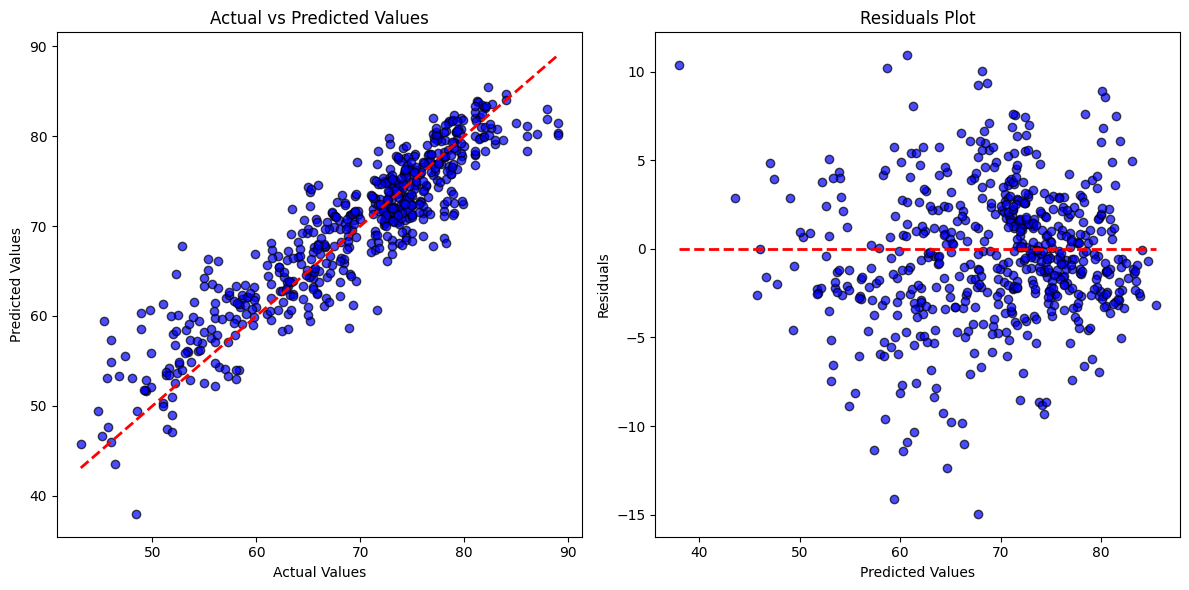

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import KFold, learning_curve, GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.001],
    'iterations': [1000, 5000],
    'lambda_param': [0.01, 0.1, 1.0]
}

lasso_model = LassoRegression()
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Lowest MSE found: ", -grid_search.best_score_)

Best parameters found:  {'iterations': 5000, 'lambda_param': 0.01, 'learning_rate': 0.01}
Lowest MSE found:  17.019078180932627


# Elastic Net Regression

Train MSE: 17.781174338607407
Test MSE: 15.724593172434382
Train R^2 Score: 0.8044240097055274
Test R^2 Score: 0.8246911235283931


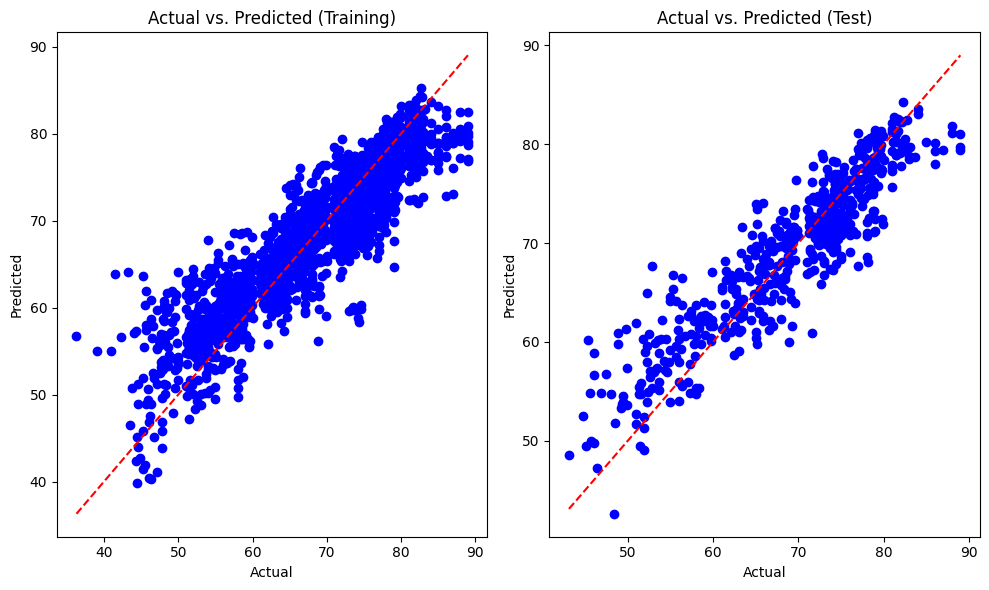

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

class ElasticNetRegression:
    def __init__(self, alpha=1.0, l1_ratio=0.5, max_iter=1000, tol=1e-4, learning_rate=0.01):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.max_iter = max_iter
        self.tol = tol
        self.learning_rate = learning_rate
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.random.randn(n + 1)
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term

        for iteration in range(self.max_iter):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.theta) - y)  # Compute gradients

            # Update intercept separately (no regularization)
            gradients[0] = gradients[0]
            # Update coefficients with both Lasso and Ridge regularization
            gradients[1:] += self.alpha * self.l1_ratio * np.sign(self.theta[1:]) + self.alpha * (1 - self.l1_ratio) * self.theta[1:]

            # Update parameters using gradient descent
            self.theta -= self.learning_rate * gradients

            # Check for convergence
            if np.linalg.norm(gradients) < self.tol:
                break

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
        return X_b.dot(self.theta)

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and fit the Elastic Net model
elastic_net = ElasticNetRegression()
elastic_net.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = elastic_net.predict(X_train_scaled)
y_pred_test = elastic_net.predict(X_test_scaled)

# Evaluation Metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual vs. predicted values for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red')
plt.title('Actual vs. Predicted (Training)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting actual vs. predicted values for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Quantile Regression (Median Regression)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class QuantileRegressor1:
    def __init__(self, quantile=0.5, learning_rate=0.1, n_iterations=10000, tolerance=1e-6): # For quantile = 0.5, this is median regression
        self.quantile = quantile
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.theta = None

    def quantile_loss(self, y_true, y_pred):
        error = y_true - y_pred
        return np.maximum(self.quantile * error, (self.quantile - 1) * error).mean()

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        m, n = X_b.shape
        self.theta = np.zeros(n)
        previous_theta = self.theta.copy()

        # I have used Coordinate gradient descent algorithm
        for iteration in range(self.n_iterations):
            for j in range(n):
                # We calculate partial derivative with respect to theta_j
                y_pred = X_b.dot(self.theta)
                error = y - y_pred
                gradient = -np.dot(X_b[:, j], (self.quantile * (error > 0) + (self.quantile - 1) * (error < 0))) / m

                # We update only theta_j
                self.theta[j] -= self.learning_rate * gradient

            # We check for convergence
            print(f"Epoch {iteration + 1}/{self.n_iterations} - quantile loss : {self.quantile_loss(y, X_b.dot(self.theta))}")
            if np.linalg.norm(self.theta - previous_theta, ord=1) < self.tolerance:
                print(f'Converged after {iteration + 1} iterations.')
                break
            previous_theta = self.theta.copy()

        return self

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def transform(self, X):
        return self.predict(X)

    def score(self, X, y):
        y_pred = self.predict(X)
        return -self.quantile_loss(y, y_pred)

    def loss(self, X, y):
        y_pred = self.predict(X)
        return self.quantile_loss(y, y_pred)

In [ ]:
qr1 = QuantileRegressor1(learning_rate = 1, n_iterations = 2000)
qr1.fit(X_train_scaled, y_train)

Epoch 1/2000 - quantile loss : 34.36446965501009
Epoch 2/2000 - quantile loss : 34.11164639797919
Epoch 3/2000 - quantile loss : 33.858823140948296
Epoch 4/2000 - quantile loss : 33.60599988391739
Epoch 5/2000 - quantile loss : 33.353176626886494
Epoch 6/2000 - quantile loss : 33.100353369855604
Epoch 7/2000 - quantile loss : 32.8475301128247
Epoch 8/2000 - quantile loss : 32.5947068557938
Epoch 9/2000 - quantile loss : 32.3418835987629
Epoch 10/2000 - quantile loss : 32.08906034173201
Epoch 11/2000 - quantile loss : 31.836237084701104
Epoch 12/2000 - quantile loss : 31.583413827670206
Epoch 13/2000 - quantile loss : 31.330590570639306
Epoch 14/2000 - quantile loss : 31.07776731360841
Epoch 15/2000 - quantile loss : 30.824944056577515
Epoch 16/2000 - quantile loss : 30.57212079954661
Epoch 17/2000 - quantile loss : 30.31929754251571
Epoch 18/2000 - quantile loss : 30.066474285484812
Epoch 19/2000 - quantile loss : 29.81365102845392
Epoch 20/2000 - quantile loss : 29.560827771423014
Epo

In [ ]:
from sklearn.metrics import r2_score
y_pred_quant1 = qr1.predict(X_test_scaled)
print(f"R2 score of this model on test data : {r2_score(y_test, y_pred_quant1):.4f}")

R2 score of this model on test data : 0.8335


In [ ]:
# Here I have used Adam optimization algorithm along with Coordinate descent

class QuantileRegressor2:
    def __init__(self, quantile=0.5, learning_rate=0.01, n_iterations=1000, tolerance=1e-6, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.quantile = quantile
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.theta = None

    def quantile_loss(self, y_true, y_pred):
        error = y_true - y_pred
        return np.maximum(self.quantile * error, (self.quantile - 1) * error).mean()

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        m, n = X_b.shape
        self.theta = np.zeros(n)
        m_t = np.zeros(n)  # 1st moment vector
        v_t = np.zeros(n)  # 2nd moment vector
        t = 0
        previous_theta = self.theta.copy()

        for iteration in range(self.n_iterations):
            t += 1
            for j in range(n):
                # We calculate partial derivative with respect to only theta_j
                y_pred = X_b.dot(self.theta)
                error = y - y_pred
                gradient = -np.dot(X_b[:, j], (self.quantile * (error > 0) + (self.quantile - 1) * (error < 0))) / m

                # Update biased first moment estimate
                m_t[j] = self.beta1 * m_t[j] + (1 - self.beta1) * gradient
                # Update biased second raw moment estimate
                v_t[j] = self.beta2 * v_t[j] + (1 - self.beta2) * (gradient ** 2)
                # Compute bias-corrected first moment estimate
                m_hat = m_t[j] / (1 - self.beta1 ** t)
                # Compute bias-corrected second raw moment estimate
                v_hat = v_t[j] / (1 - self.beta2 ** t)
                # Update parameters
                self.theta[j] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

            # We check for convergence
            print(f"Epoch {iteration + 1}/{self.n_iterations} - quantile loss : {self.quantile_loss(y, X_b.dot(self.theta))}")
            if np.linalg.norm(self.theta - previous_theta, ord=1) < self.tolerance:
                print(f'Converged after {iteration + 1} iterations.')
                break
            previous_theta = self.theta.copy()

        return self

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def transform(self, X):
        return self.predict(X)

    def score(self, X, y):
        y_pred = self.predict(X)
        return -self.quantile_loss(y, y_pred)

    def loss(self, X, y):
        y_pred = self.predict(X)
        return self.quantile_loss(y, y_pred)


In [ ]:
qr2 = QuantileRegressor2(learning_rate = 0.01, n_iterations = 10000)
qr2.fit(X_train_scaled, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 5001/10000 - quantile loss : 9.426891463823669
Epoch 5002/10000 - quantile loss : 9.422811065788384
Epoch 5003/10000 - quantile loss : 9.418737942689228
Epoch 5004/10000 - quantile loss : 9.414663071236246
Epoch 5005/10000 - quantile loss : 9.410579468972713
Epoch 5006/10000 - quantile loss : 9.406498324148206
Epoch 5007/10000 - quantile loss : 9.402415952395936
Epoch 5008/10000 - quantile loss : 9.398337944836712
Epoch 5009/10000 - quantile loss : 9.394259191043085
Epoch 5010/10000 - quantile loss : 9.390188301060771
Epoch 5011/10000 - quantile loss : 9.386113235742188
Epoch 5012/10000 - quantile loss : 9.382038931830397
Epoch 5013/10000 - quantile loss : 9.377966037399421
Epoch 5014/10000 - quantile loss : 9.373898222351986
Epoch 5015/10000 - quantile loss : 9.369825910266727
Epoch 5016/10000 - quantile loss : 9.365753424953816
Epoch 5017/10000 - quantile loss : 9.361682282597457
Epoch 5018/10000 - quantile loss : 9.35761798948

In [ ]:
y_pred_quant2 = qr2.predict(X_test_scaled)
print(f"R2 score of this model on test data : {r2_score(y_test, y_pred_quant2):.4f}")

R2 score of this model on test data : 0.8339


The second model is better.
We plot it.

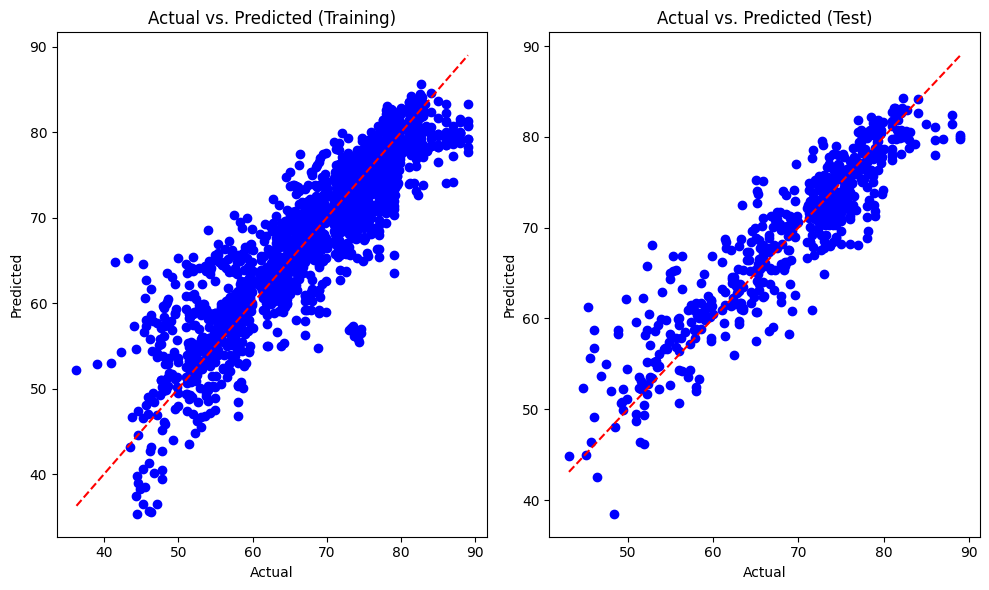

In [ ]:
y_pred_train_quant = qr2.predict(X_train_scaled)
# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual vs. predicted values for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_quant, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red')
plt.title('Actual vs. Predicted (Training)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting actual vs. predicted values for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_quant2, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Support Vector Regression

In [ ]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

class SupportVectorRegression:
    def __init__(self, kernel='rbf', C=1.0, epsilon=0.1, gamma=0.1):
        self.kernel = kernel
        self.C = C
        self.epsilon = epsilon
        self.gamma = gamma

    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def _rbf_kernel(self, X1, X2):
        if X1.ndim == 1 and X2.ndim == 1:
            return np.exp(-self.gamma * np.linalg.norm(X1 - X2) ** 2)
        elif X1.ndim > 1 and X2.ndim > 1:
            return np.exp(-self.gamma * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)
        else:
            return np.exp(-self.gamma * np.linalg.norm(X1 - X2) ** 2)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        if self.kernel == 'linear':
            K = self._linear_kernel(X, X)
        elif self.kernel == 'rbf':
            K = self._rbf_kernel(X, X)

        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), 'd')
        b = cvxopt.matrix(0.0)

        G_std = np.diag(np.ones(n_samples) * -1)
        h_std = np.zeros(n_samples)

        G_slack = np.diag(np.ones(n_samples))
        h_slack = np.ones(n_samples) * self.C

        G = cvxopt.matrix(np.vstack((G_std, G_slack)))
        h = cvxopt.matrix(np.hstack((h_std, h_slack)))

        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        alphas = np.ravel(solution['x'])
        sv = alphas > 1e-5
        self.alphas = alphas[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        # Calculate b using the support vectors
        self.b = np.mean(self.sv_y - np.dot(self.alphas * self.sv_y, K[sv][:, sv]))

    def predict(self, X):
        if self.kernel == 'linear':
            K = self._linear_kernel(self.sv, X)
        elif self.kernel == 'rbf':
            K = self._rbf_kernel(self.sv, X)

        return np.dot(self.alphas * self.sv_y, K) + self.b

# Create and fit the SVR model
svr = SupportVectorRegression(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predict using the model
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(X_test_scaled, y_test, color='darkorange', label='data')
plt.plot(X_tes_scaledt, y_pred, color='navy', lw=2, label='SVR model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), None)